In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Create and populate the sales_data.db
conn = sqlite3.connect("sales_data.db")
cur = conn.cursor()

cur.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    order_date TEXT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
sample_data = [
    ('2025-09-01', 'Widget A', 5, 9.99),
    ('2025-09-02', 'Widget B', 3, 19.99),
    ('2025-09-03', 'Widget A', 2, 9.99),
    ('2025-09-04', 'Widget C', 7, 4.50),
    ('2025-09-05', 'Widget B', 1, 19.99),
    ('2025-09-05', 'Widget C', 10, 4.50),
    ('2025-08-03', 'Widget D', 6, 9.09),
    ('2025-07-04', 'Widget E', 4, 5.50),
    ('2025-06-05', 'Widget F', 8, 10.99),
    ('2025-05-05', 'Widget D', 10, 9.09),
]

cur.executemany(
    "INSERT INTO sales (order_date, product, quantity, price) VALUES (?, ?, ?, ?)",
    sample_data
)

conn.commit()
conn.close()
print("Database created and sample data inserted.")


Database created and sample data inserted.


In [23]:
# Connect to the SQLite database
conn = sqlite3.connect("sales_data.db")

query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC;
"""

df = pd.read_sql_query(query, conn)
df['revenue'] = df['revenue'].round(2)  # round for neatness

print("Sales Summary by Product:\n")
print(df)

conn.close()


Sales Summary by Product:

    product  total_qty  revenue
0  Widget D         32   290.88
1  Widget B         12   239.88
2  Widget C         51   229.50
3  Widget A         21   209.79
4  Widget F         16   175.84
5  Widget E          8    44.00


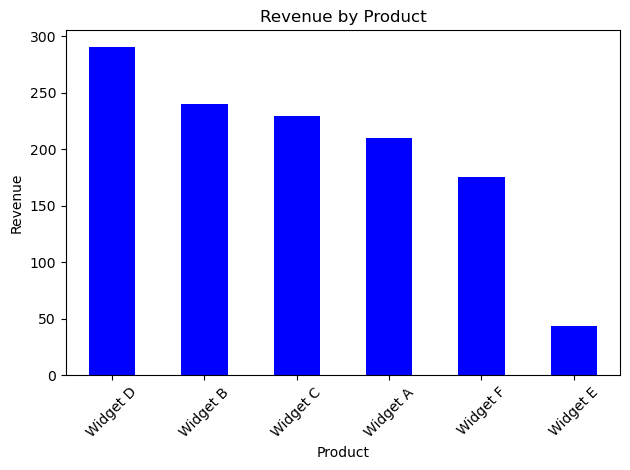

In [19]:
# Plot Revenue by Product
ax = df.plot(kind='bar', x='product', y='revenue', legend=False, color='blue')

ax.set_title("Revenue by Product")
ax.set_ylabel("Revenue")
ax.set_xlabel("Product")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Sales Summary by Product (with Total):

 product  total_qty  revenue
Widget D         32   290.88
Widget B         12   239.88
Widget C         51   229.50
Widget A         21   209.79
Widget F         16   175.84
Widget E          8    44.00
   TOTAL        140  1189.89


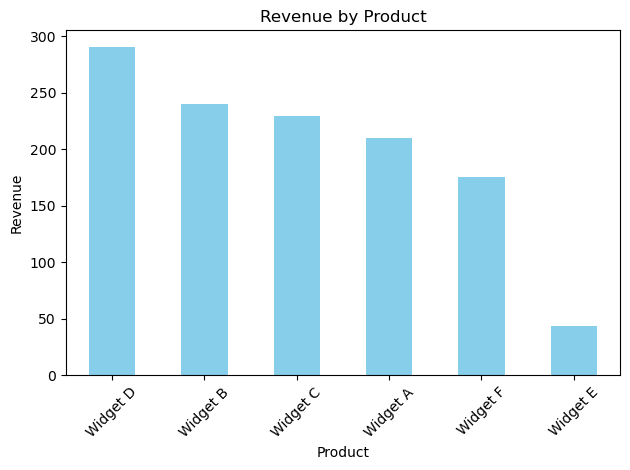

In [20]:
conn = sqlite3.connect("sales_data.db")

# SQL query: get all products with total quantity and revenue
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC;
"""

# Run query and load into DataFrame
df = pd.read_sql_query(query, conn)

# Round revenue for neat display
df['revenue'] = df['revenue'].round(2)

# ---- Add total summary row ----
total_qty = df['total_qty'].sum()
total_revenue = df['revenue'].sum().round(2)

summary_row = pd.DataFrame({
    'product': ['TOTAL'],
    'total_qty': [total_qty],
    'revenue': [total_revenue]
})

# Append summary row to DataFrame
df = pd.concat([df, summary_row], ignore_index=True)

# Print results
print("Sales Summary by Product (with Total):\n")
print(df.to_string(index=False))

# Close connection
conn.close()

# Plot bar chart of revenue by product (excluding TOTAL row for clarity)
df_plot = df[df['product'] != 'TOTAL']
ax = df_plot.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')

ax.set_title("Revenue by Product")
ax.set_ylabel("Revenue")
ax.set_xlabel("Product")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
df.to_csv("sales_summary.csv", index=False)
plt.savefig("sales_chart.png", dpi=150)

<Figure size 640x480 with 0 Axes>

Sales Summary by Product (with Total):

 product  total_qty  revenue
Widget D         32   290.88
Widget B         12   239.88
Widget C         51   229.50
Widget A         21   209.79
Widget F         16   175.84
Widget E          8    44.00
   TOTAL        140  1189.89


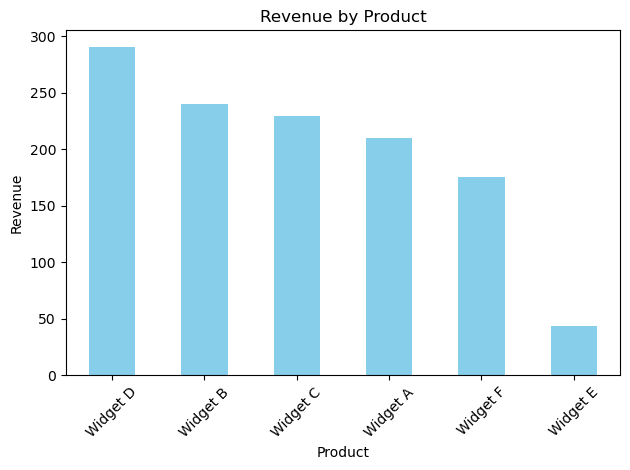

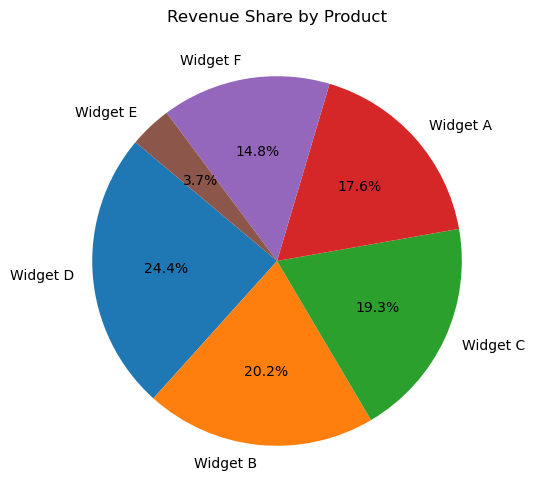


Monthly Revenue Trend:

     month  revenue
0  2025-05    90.90
1  2025-06    87.92
2  2025-07    22.00
3  2025-08    54.54
4  2025-09   934.53


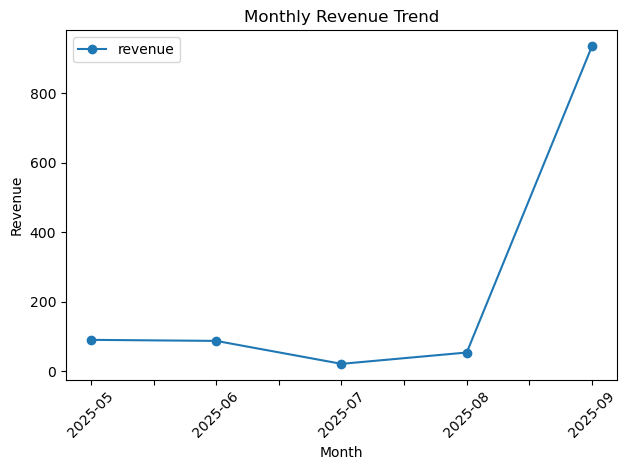

In [22]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to DB
conn = sqlite3.connect("sales_data.db")

# Sales summary by product
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC;
"""
df = pd.read_sql_query(query, conn)
df['revenue'] = df['revenue'].round(2)

# Add total row
total_qty = df['total_qty'].sum()
total_revenue = df['revenue'].sum().round(2)
summary_row = pd.DataFrame({
    'product': ['TOTAL'],
    'total_qty': [total_qty],
    'revenue': [total_revenue]
})
df = pd.concat([df, summary_row], ignore_index=True)

print("Sales Summary by Product (with Total):\n")
print(df.to_string(index=False))

# ---- FEATURE 1: Bar Chart of Revenue by Product ----
df_plot = df[df['product'] != 'TOTAL']
ax = df_plot.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)
ax.set_title("Revenue by Product")
ax.set_ylabel("Revenue")
ax.set_xlabel("Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_chart.png", dpi=150)
plt.show()

# ---- FEATURE 2: Pie Chart of Revenue Share ----
plt.figure(figsize=(6,6))
plt.pie(df_plot['revenue'], labels=df_plot['product'], autopct='%1.1f%%', startangle=140)
plt.title("Revenue Share by Product")
plt.savefig("sales_pie.png", dpi=150)
plt.show()

# ---- FEATURE 3: Monthly Sales Trend ----
query_trend = """
SELECT strftime('%Y-%m', order_date) AS month,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY month
ORDER BY month;
"""
df_trend = pd.read_sql_query(query_trend, conn)
df_trend['revenue'] = df_trend['revenue'].round(2)

print("\nMonthly Revenue Trend:\n")
print(df_trend)

# Line chart for monthly trend
ax2 = df_trend.plot(kind='line', x='month', y='revenue', marker='o')
ax2.set_title("Monthly Revenue Trend")
ax2.set_ylabel("Revenue")
ax2.set_xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_trend.png", dpi=150)
plt.show()

# Save data to CSV
df.to_csv("sales_summary.csv", index=False)
df_trend.to_csv("monthly_trend.csv", index=False)

conn.close()
